In [6]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
from matplotlib import pyplot as plt
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

<DeviceId.GPU0: 0>

In [7]:
from deoldify.visualize import *

plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True

import warnings

warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*?Your .*? set is empty.*?"
)

from pathlib import Path
import time

In [8]:
# Load all images
image_paths = []
file_path = 'inputs/grayscale/'

for image_path in os.listdir(file_path):
    if (image_path.endswith('.jpg')):
        # Collect image as valid path
        image_paths.append(file_path + image_path)
        
print(len(image_paths))

6990


In [4]:
# To use stable model, set to false
useArtistic = False

# Set output directory based on model
output = 'inputs/colorized_artistic/' if useArtistic else 'inputs/colorized_stable/'

# Load respective model
colorizer = get_image_colorizer(artistic=useArtistic)

AttributeError: 'Figure' object has no attribute 'close'

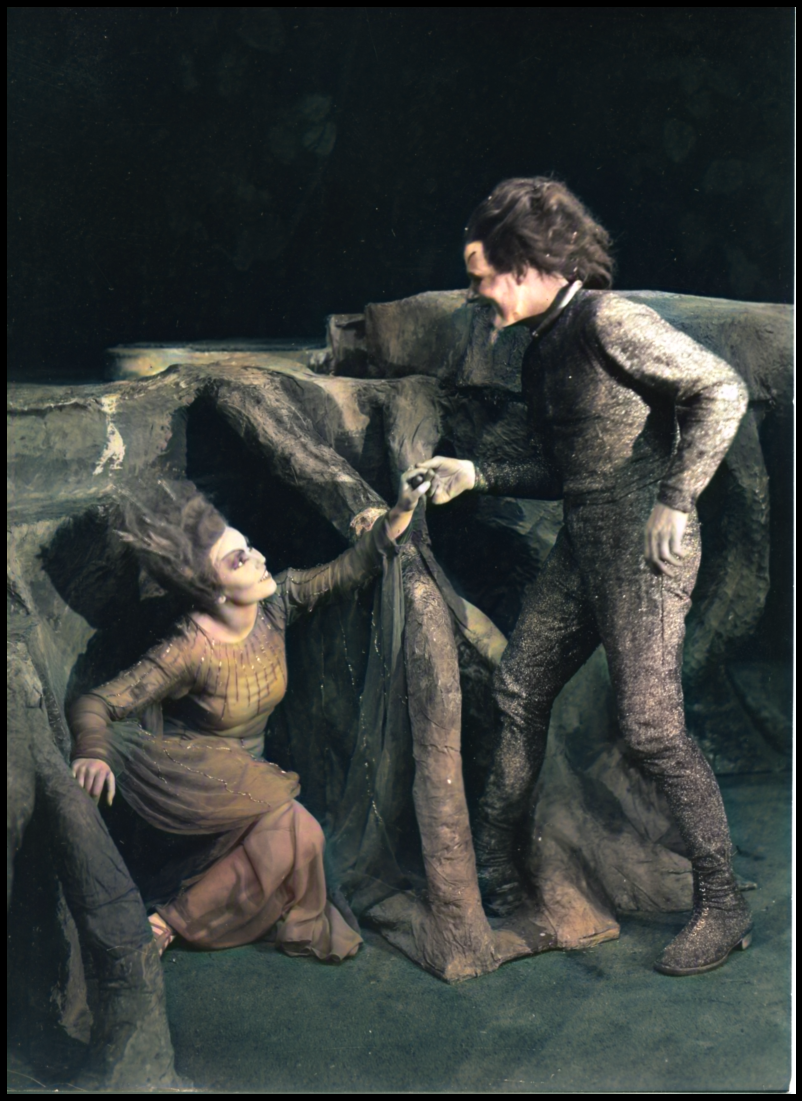

<Figure size 432x288 with 0 Axes>

In [9]:
#NOTE:  Max is 45 with 11GB video cards. 35 is a good default
render_factor=30

start_time = time.time()
count = len(image_paths)
i = 1
percentage = ''

# Generate colorized images
for image_path in image_paths:
    result_path = colorizer.plot_transformed_image(
        path=image_path,
        render_factor=render_factor,
        compare=False,
        results_dir=Path(output)
    )
    plt.clf()
    # Get percentage
    percentage = (i / count) * 100
    # Print percentage
    print(f'{percentage:.1f}' + '%')
    i += 1
    
runtime = ((time.time() - start_time) / 60)
print("--- Runtime: " + f'{runtime:.2f}' + " minutes ---")